# BUSSINES UNDERSTANDING

# Library Requirement 

In [2]:
# Tentukan library yang dibutuhkan
import pandas as pd 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.decomposition import PCA 

In [3]:
df = pd.read_csv("BencanaPWK2022.csv")

In [4]:
df.head()

,id,Nama Kecamatan,pohon tumbang,angin_puting_beliung,longsor tanah,banjir,gempa,karhutla,bangunan ambruk,kekeringan,Jumlah Bencana,kecamatan_id,kelas_kerawanan,kelas_id
0,1,JATILUHUR,0,2,3,2,0,1,2,0,10,6,Rawan,3
1,2,SUKASARI,1,1,2,0,0,0,0,0,4,13,Sedang,2
2,3,MANIIS,0,1,3,1,0,0,1,0,6,8,Sedang,2
3,4,TEGAL WARU,0,1,6,0,0,1,0,0,8,15,Sedang,2
4,5,PLERED,0,2,0,1,1,0,3,0,7,10,Sedang,2


# Exploratory Data Analisys

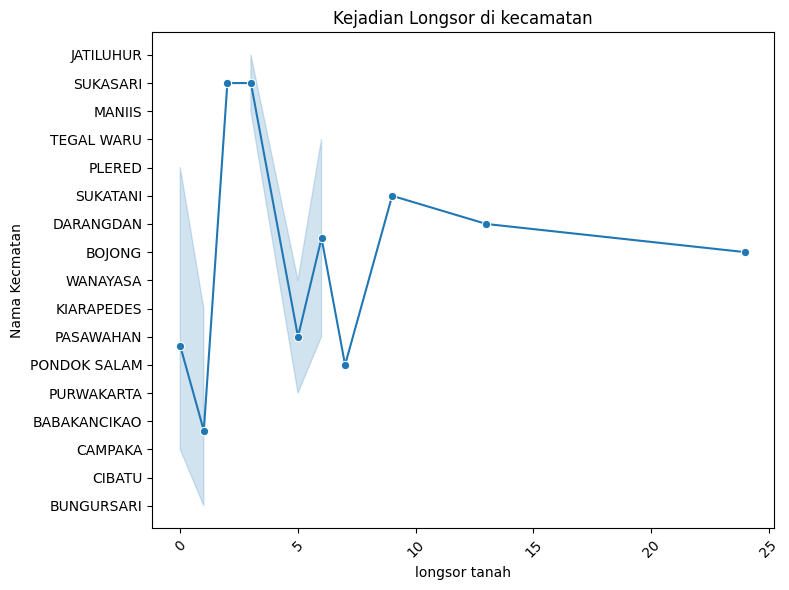

In [5]:
#1. line plot untuk kejadian Longsor di berbagai Kecamatan
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='longsor tanah', y='Nama Kecamatan', marker='o')
plt.title('Kejadian Longsor di kecamatan')
plt.ylabel('Nama Kecmatan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

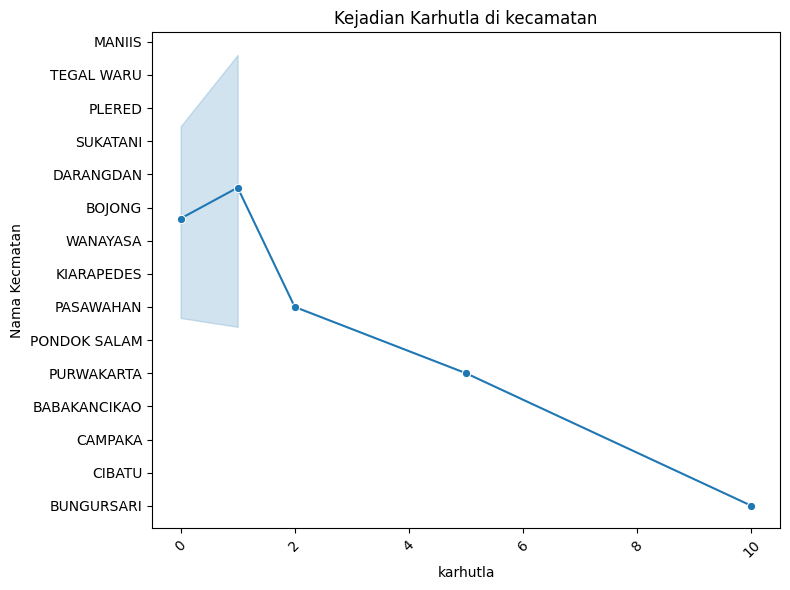

In [6]:
#2. line plot untuk kejadian karhutla di berbagai Kecamatan
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='karhutla', y='Nama Kecamatan', marker='o')
plt.title('Kejadian Karhutla di kecamatan')
plt.ylabel('Nama Kecmatan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\usern\AppData\Local\Temp\ipykernel_11660\4284909656.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


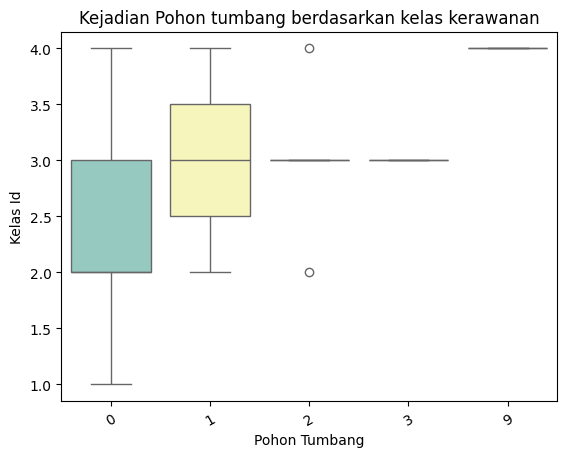

In [7]:
#1. Box Plot Kejadian Pohon tumbang berdasarkan kelas kerawanan
sns.boxplot(data=df,
            x='pohon tumbang',
            y='kelas_id',
            palette='Set3')
plt.title("Kejadian Pohon tumbang berdasarkan kelas kerawanan")
plt.xlabel("Pohon Tumbang")
plt.ylabel("Kelas Id")
plt.xticks(rotation=30)
plt.show()

C:\Users\usern\AppData\Local\Temp\ipykernel_11660\2033407737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


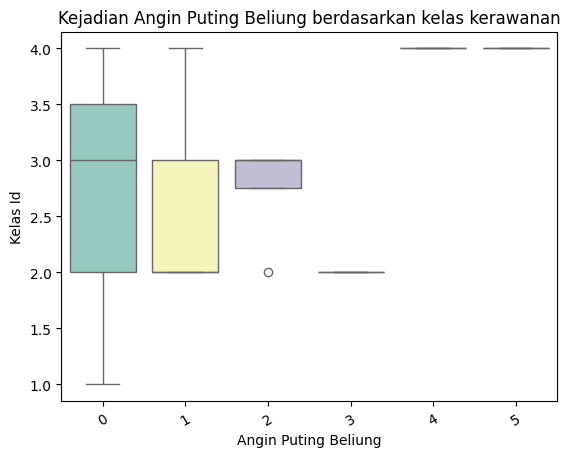

In [8]:
#2. box plot Kejadian Angin Puting Beliung berdasarkan kelas kerawanan
sns.boxplot(data=df,
            x='angin_puting_beliung',
            y='kelas_id',
            palette='Set3')
plt.title("Kejadian Angin Puting Beliung berdasarkan kelas kerawanan")
plt.xlabel("Angin Puting Beliung")
plt.ylabel("Kelas Id")
plt.xticks(rotation=30)
plt.show()

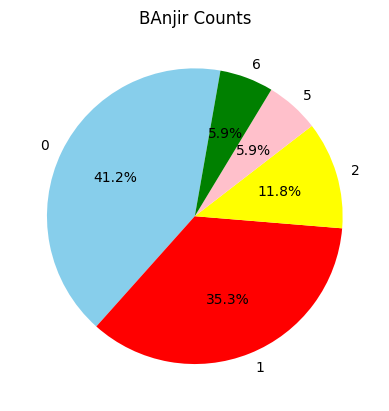

In [9]:
# 1.Pie Chart
banjir_counts = df['banjir'].value_counts()
plt.pie(banjir_counts,
        labels=banjir_counts.index,
        autopct='%1.1f%%',
        colors=['skyblue', 'red', 'yellow', 'pink', 'green'],
        startangle=80)
plt.title("BAnjir Counts")
plt.show()

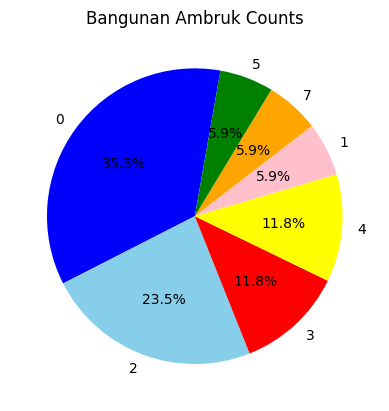

In [10]:
# 2.Pie Chart
BA_counts = df['bangunan ambruk'].value_counts()
plt.pie(BA_counts,
        labels=BA_counts.index,
        autopct='%1.1f%%',
        colors=['blue', 'skyblue', 'red', 'yellow', 'pink', 'orange', 'green'],
        startangle=80)
plt.title("Bangunan Ambruk Counts")
plt.show()

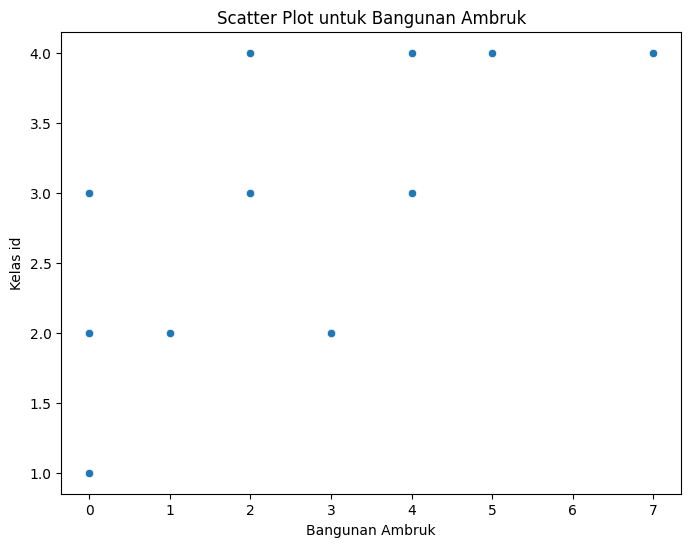

In [11]:
#scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bangunan ambruk', y='kelas_id', data=df)
plt.title('Scatter Plot untuk Bangunan Ambruk')
plt.xlabel('Bangunan Ambruk')
plt.ylabel('Kelas id')
plt.show()

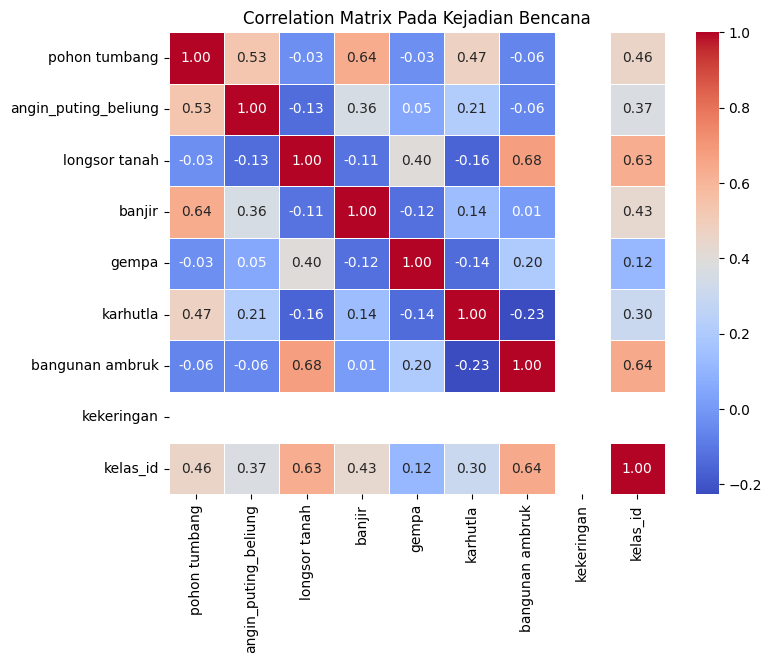

In [12]:
# Correlation Matrix
quant_cols = ['pohon tumbang', 'angin_puting_beliung', 'longsor tanah', 'banjir', 'gempa', 'karhutla', 'bangunan ambruk', 'kekeringan', 'kelas_id']
df_features = df[quant_cols]

correlation_matrix = df_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar=True
)
plt.title('Correlation Matrix Pada Kejadian Bencana')
plt.show()

# DATA PREPARATION

# Data Information

In [13]:
# berikan informasi dataset seperti jumlah kolom, jumlah baris, tipe data, dll
#jumlahbaris, jumlah kolom
print(df.shape)

#tipe data/kolom
df.info()

#isi data lima baris pertama
df.head()

(17, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    17 non-null     int64 
 1   Nama Kecamatan        17 non-null     object
 2   pohon tumbang         17 non-null     int64 
 3   angin_puting_beliung  17 non-null     int64 
 4   longsor tanah         17 non-null     int64 
 5   banjir                17 non-null     int64 
 6   gempa                 17 non-null     int64 
 7   karhutla              17 non-null     int64 
 8   bangunan ambruk       17 non-null     int64 
 9   kekeringan            17 non-null     int64 
 10  Jumlah Bencana        17 non-null     int64 
 11  kecamatan_id          17 non-null     int64 
 12  kelas_kerawanan       17 non-null     object
 13  kelas_id              17 non-null     int64 
dtypes: int64(12), object(2)
memory usage: 2.0+ KB


,id,Nama Kecamatan,pohon tumbang,angin_puting_beliung,longsor tanah,banjir,gempa,karhutla,bangunan ambruk,kekeringan,Jumlah Bencana,kecamatan_id,kelas_kerawanan,kelas_id
0,1,JATILUHUR,0,2,3,2,0,1,2,0,10,6,Rawan,3
1,2,SUKASARI,1,1,2,0,0,0,0,0,4,13,Sedang,2
2,3,MANIIS,0,1,3,1,0,0,1,0,6,8,Sedang,2
3,4,TEGAL WARU,0,1,6,0,0,1,0,0,8,15,Sedang,2
4,5,PLERED,0,2,0,1,1,0,3,0,7,10,Sedang,2


# Data Transformation

In [14]:
#Missing Values (jika ada, bisa diisi dengan 0 karena data bencana)
df = df.fillna(0)

In [15]:
features_cols =['pohon tumbang', 'angin_puting_beliung', 'longsor tanah', 'banjir', 'gempa', 'karhutla', 'bangunan ambruk', 'kekeringan']
X = df[features_cols]

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine Variabel

In [17]:
#menentukan variabel yang digunakan sebagai fitur/label
features_cols

['pohon tumbang',
 'angin_puting_beliung',
 'longsor tanah',
 'banjir',
 'gempa',
 'karhutla',
 'bangunan ambruk',
 'kekeringan']

# MODELING

# Modeling Classification / Clustering

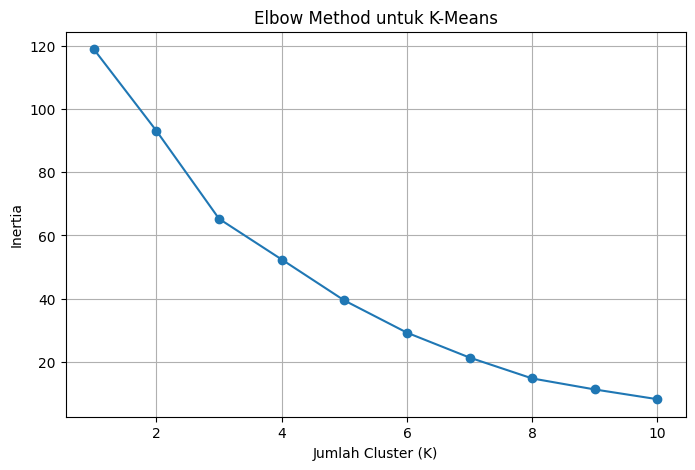

Berdasarkan Metode Elbow, diasumsikan K optimal adalah: 3


In [18]:
# buatkan modeling menggunakan algoritma ML
# Metode Elbow
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method untuk K-Means')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Berdasarkan plot elbow (asumsi titik siku optimal adalah K=3)
optimal_k = 3
print(f"Berdasarkan Metode Elbow, diasumsikan K optimal adalah: {optimal_k}")

In [27]:
#menggunakan jumlah cluster optimal
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [28]:
# mengurangi dimensi data untuk visualisasi
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X_scaled)

In [29]:
#Warna untuk setiap cluster
colors = ['blue', 'green', 'red', 'purple']

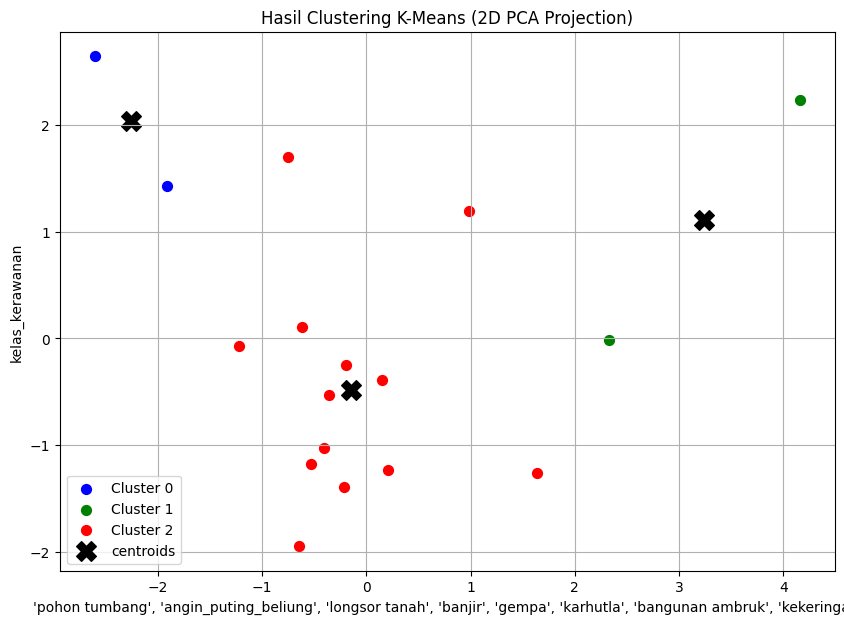

In [30]:
#plot hasil clustering
plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    cluster_points = reduced_features[df['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0],
                cluster_points[:, 1],
                s=50,
                label=f'Cluster {cluster}',
                color=colors[cluster])

#menambahkan centroid pada plot
centroids_reduced = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_reduced[:, 0],
            centroids_reduced[:, 1],
            s=200,
            c='black',
            marker='X',
            label='centroids')

#Menambahkan detail plot
plt.title("Hasil Clustering K-Means (2D PCA Projection)")
plt.xlabel("'pohon tumbang', 'angin_puting_beliung', 'longsor tanah', 'banjir', 'gempa', 'karhutla', 'bangunan ambruk', 'kekeringan'")
plt.ylabel("kelas_kerawanan")
plt.legend()
plt.grid()
plt.show()

In [31]:
# Menggunakan unsupervised learning
# Menerapkan K-Means dengan k optimal
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans_model.fit_predict(X_scaled)

print(f"\nModel K-Means telah dilatih dengan K = {optimal_k}")
print("Hasil Clustering ditambahkan ke dataframe pada kolom 'Cluster'.")

# Melihat distribusi data per cluster
print("\nDistribusi Data per Cluster:")
print(df['Cluster'].value_counts())


Model K-Means telah dilatih dengan K = 3
Hasil Clustering ditambahkan ke dataframe pada kolom 'Cluster'.

Distribusi Data per Cluster:
Cluster
1    12
2     3
0     2
Name: count, dtype: int64


# EVALUATION

# Model Evaluation Classification/Clustering

In [24]:
# Tentukan metode evaluasi yang digunakan dan berikan penjelasan terhadap hasil evaluasinya

# 1. Silhouette Score (nilai mendekati 1.0 adalah yang terbaik)
score_sil = silhouette_score(X_scaled, df['Cluster'])
print(f"\nSilhouette Score: {score_sil:.4f}")
print("Penjelasan: Silhouette Score mengukur seberapa mirip suatu objek dengan clusternya sendiri (cohesion) dibandingkan dengan cluster lain (separation). Nilai yang lebih tinggi (mendekati 1) menunjukkan bahwa objek dikelompokkan dengan baik.")

# 2. Davies-Bouldin Index (nilai mendekati 0.0 adalah yang terbaik)
score_db = davies_bouldin_score(X_scaled, df['Cluster'])
print(f"Davies-Bouldin Index: {score_db:.4f}")
print("Penjelasan: Davies-Bouldin Index mengukur rasio dispersi intra-cluster (seberapa padat cluster) terhadap separasi antar-cluster. Nilai yang lebih rendah (mendekati 0) menunjukkan clustering yang lebih baik.")

# Analisis Profil Cluster
print("\nProfil Rata-rata Fitur per Cluster (dalam skala asli):")
df_profil = df.groupby('Cluster')[features_cols].mean().reset_index()
print(df_profil)
# Profiling ini membantu dalam interpretasi:
# Cluster 0: Mungkin merupakan wilayah dengan dampak bencana rendah.
# Cluster 1: Mungkin merupakan wilayah dengan dampak bencana sedang.
# Cluster 2: Mungkin merupakan wilayah dengan dampak bencana tinggi.


Silhouette Score: 0.3060
Penjelasan: Silhouette Score mengukur seberapa mirip suatu objek dengan clusternya sendiri (cohesion) dibandingkan dengan cluster lain (separation). Nilai yang lebih tinggi (mendekati 1) menunjukkan bahwa objek dikelompokkan dengan baik.
Davies-Bouldin Index: 0.7927
Penjelasan: Davies-Bouldin Index mengukur rasio dispersi intra-cluster (seberapa padat cluster) terhadap separasi antar-cluster. Nilai yang lebih rendah (mendekati 0) menunjukkan clustering yang lebih baik.

Profil Rata-rata Fitur per Cluster (dalam skala asli):
   Cluster  pohon tumbang  angin_puting_beliung  longsor tanah    banjir  \
0        0           0.50              0.500000      18.500000  1.000000   
1        1           6.00              3.000000       2.500000  5.500000   
2        2           0.75              1.583333       3.583333  0.666667   
3        3           2.00              1.000000       1.000000  0.000000   

   gempa  karhutla  bangunan ambruk  kekeringan  
0   0.50     

# DEPLOYMENT

# Model Simulation

In [25]:
# simulasika model dengan inputan data baru
# Contoh data baru 
new_data = pd.DataFrame({
    'pohon tumbang': [1],
    'angin_puting_beliung': [2],
    'longsor tanah': [4],
    'banjir':[0],
    'gempa': [2],
    'karhutla': [1],
    'bangunan ambruk': [6],
    'kekeringan': [0]
})
# Scaling data baru menggunakan scaler yang sudah dilatih
new_data_scaled = scaler.transform(new_data)

# Memprediksi cluster
new_clusters = kmeans_model.predict(new_data_scaled)

new_data['Predicted_Cluster'] = new_clusters

print("\nHasil Simulasi Data Baru:")
print(new_data)


Hasil Simulasi Data Baru:
   pohon tumbang  angin_puting_beliung  longsor tanah  banjir  gempa  \
0              1                     2              4       0      2   

   karhutla  bangunan ambruk  kekeringan  Predicted_Cluster  
0         1                6           0                  2  


# SAVE MODEL

In [26]:
# simpan model sebelum dilanjutkan ke aplikasi streamlit
import joblib

# Simpan model K-Means
joblib.dump(kmeans_model, 'kmeans_model.pkl')
print("Model K-Means (kmeans_model.pkl) berhasil disimpan.")

# Simpan Scaler (PENTING! harus disimpan untuk standardisasi input deployment)
joblib.dump(scaler, 'scaler.pkl')
print("Model Scaler (scaler.pkl) berhasil disimpan.")

Model K-Means (kmeans_model.pkl) berhasil disimpan.
Model Scaler (scaler.pkl) berhasil disimpan.
